c:\Users\3calss_15\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\3calss_15\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


0~4세        683649
5~9세       1024361
10~14세     1197204
15~19세     1196135
20~24세     1452989
25~29세     1783849
30~34세     1785954
35~39세     1635037
40~44세     2059426
45~49세     1968824
50~54세     2279677
55~59세     2105873
60~64세     2095791
65~69세     1660036
70~74세     1062361
75~79세      756369
80~84세      519060
85~89세      229165
90~94세       59066
95~99세        9487
100세 이상       1423
Name: 전국  , dtype: object
0~4세        650939
5~9세        973943
10~14세     1133765
15~19세     1124356
20~24세     1341451
25~29세     1619197
30~34세     1613298
35~39세     1541259
40~44세     1989833
45~49세     1904051
50~54세     2223983
55~59세     2086166
60~64세     2123908
65~69세     1750973
70~74세     1203628
75~79세      943845
80~84세      812217
85~89세      484582
90~94세      187363
95~99세       43722
100세 이상       7114
Name: 전국  , dtype: object


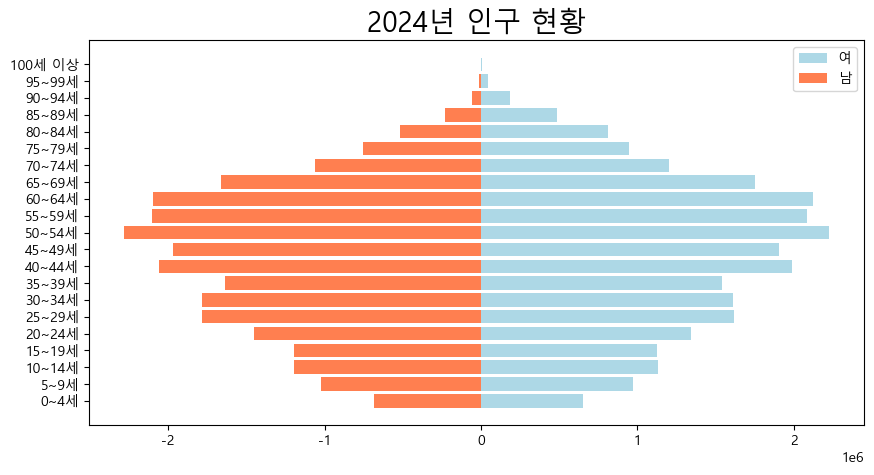

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 10

# 엑셀 파일 경로
file_path = '202312_202312_연령별인구현황_월간.xlsx'

# 엑셀 파일 읽기 (컬럼명이 두 번째 행에 있는 경우)
use_cols_male = 'B,AB:AV'
use_cols_female = 'B,AY:BS'

df_m = pd.read_excel(file_path, sheet_name=0, skiprows=3, index_col='행정기관', usecols=use_cols_male)
df_fm = pd.read_excel(file_path, sheet_name=0, skiprows=3, index_col='행정기관', usecols=use_cols_female)

# 데이터 전처리 함수 정의
def clean_data(df):
    df.iloc[0] = df.iloc[0].str.replace(',', '').astype(int)
    df.columns = [col.split('.')[0] for col in df.columns]
    return df

# 데이터 전처리
df_m = clean_data(df_m)
df_fm = clean_data(df_fm)

# 데이터 확인
print(df_m.iloc[0])
print(df_fm.iloc[0])

# 시각화
plt.figure(figsize=(10, 5))
plt.barh(df_fm.columns, df_fm.iloc[0], label='여', color='lightblue')
plt.barh(df_m.columns, -df_m.iloc[0], label='남', color='coral')
plt.legend()
plt.title('2024년 인구 현황', size=20)
plt.savefig('연령별남여비율2024.png', dpi=1000)
plt.show()
